#IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, MaxPooling2D, Flatten, Conv2D
from PIL import Image

#LOADING THE DATA AND SETTING PARAMETERS




In [ ]:
#Loading the Dataset
data_dir='/content/drive/MyDrive/chest_xray'
train_dir='/content/drive/MyDrive/chest_xray/train'
test_dir='/content/drive/MyDrive/chest_xray/test'
val_dir='/content/drive/MyDrive/chest_xray/val'

training_dir="../content/drive/MyDrive/chest_xray/train"
test_dir="../content/drive/MyDrive/chest_xray/test/"
validation_dir="../content/drive/MyDrive/chest_xray/val/"

Below is the X-Ray image of a person suffering from Pneumonia.

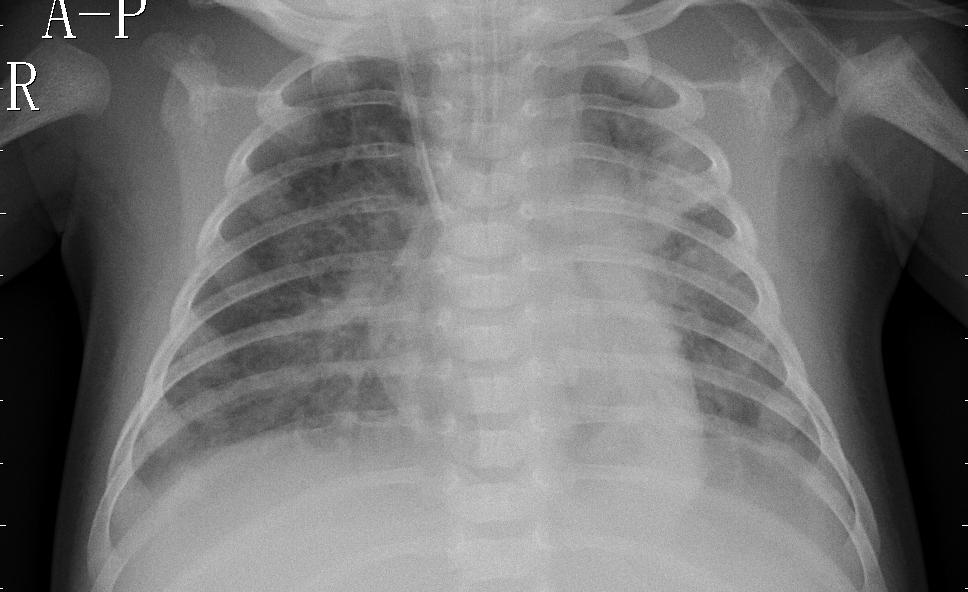

In [ ]:
image="../content/drive/MyDrive/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg"
PIL.Image.open(image)

Below is the X-ray image of normal lungs.

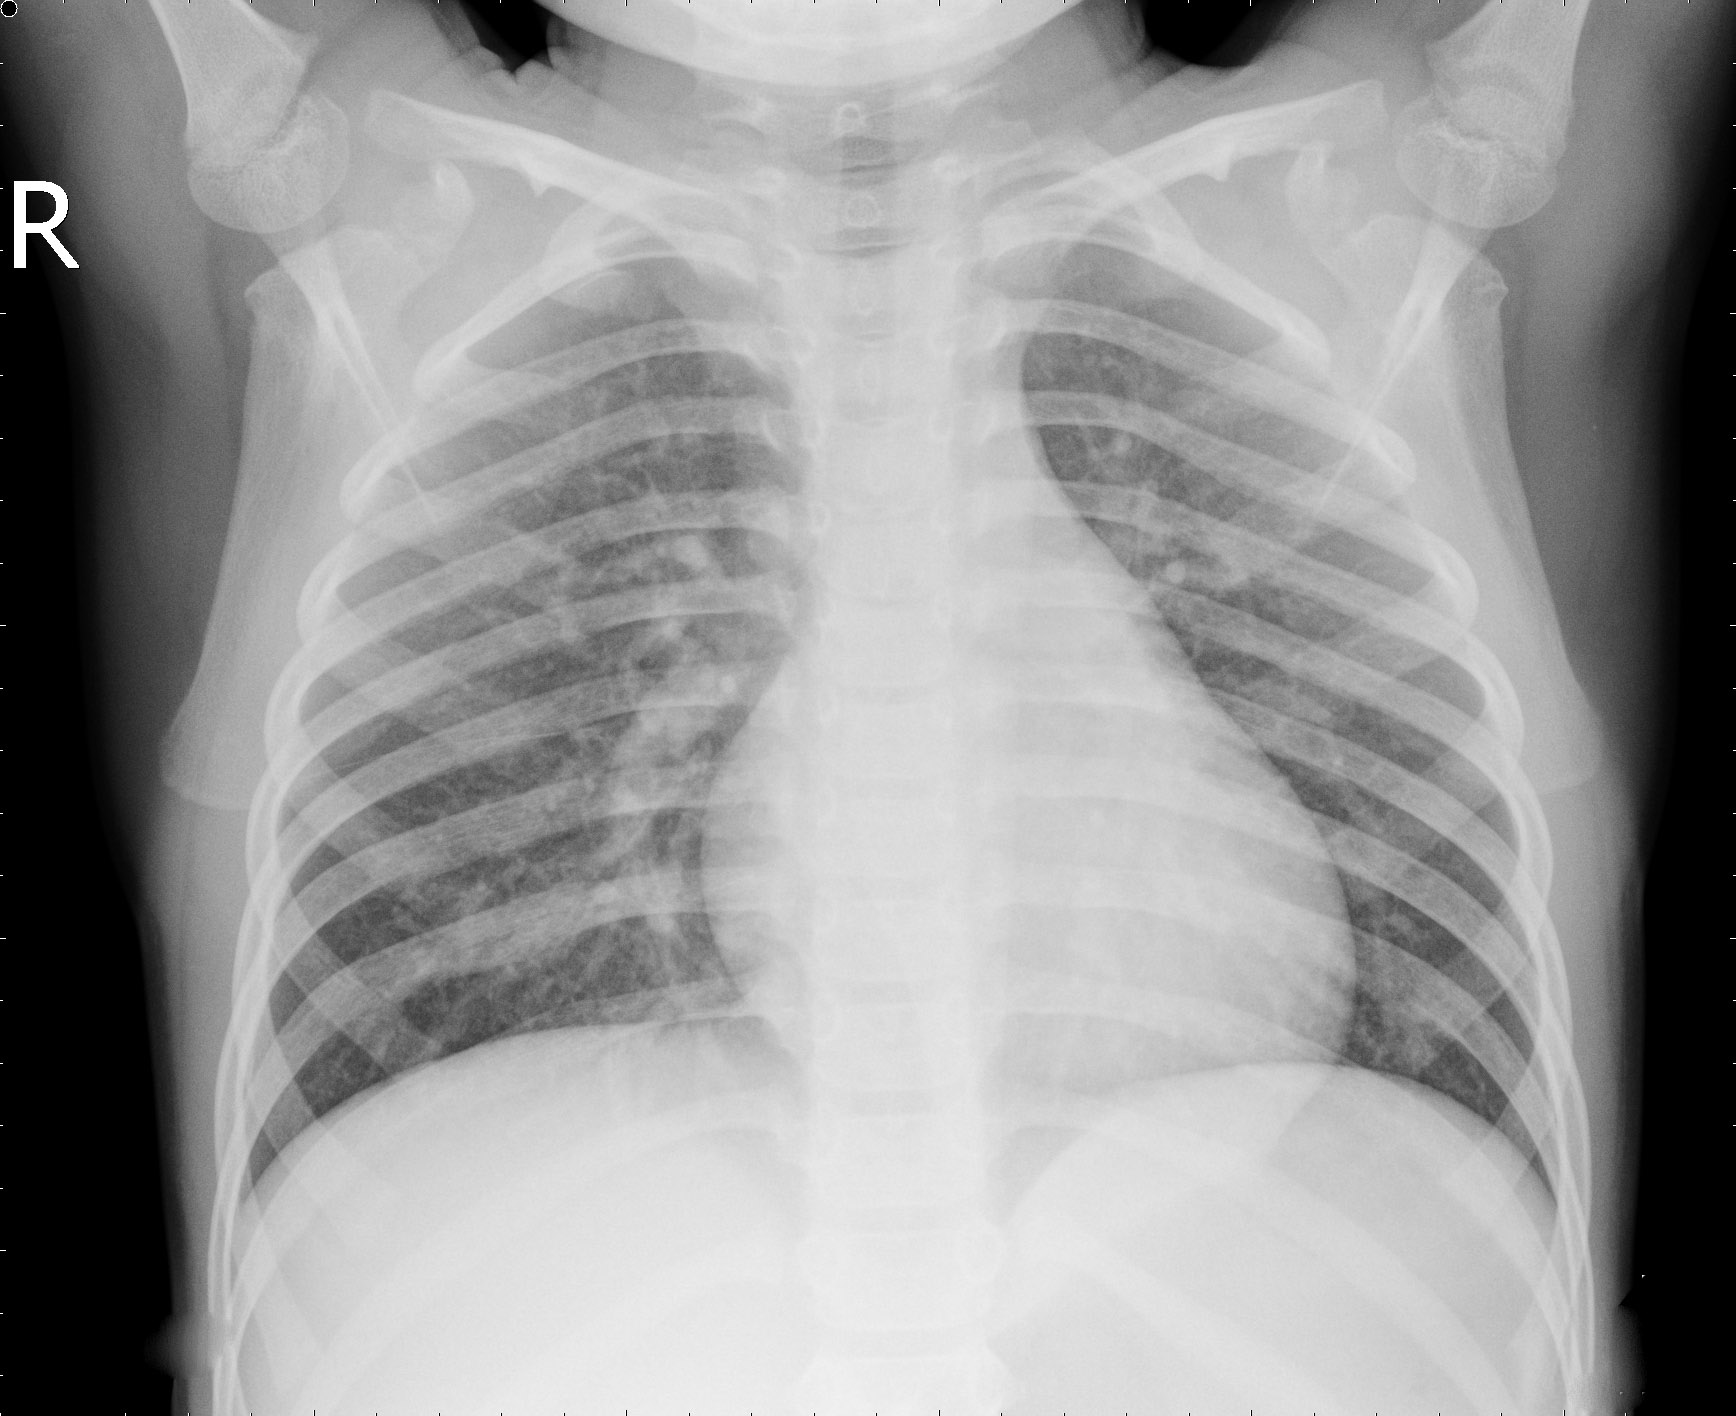

In [ ]:
image="../content/drive/MyDrive/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg"
PIL.Image.open(image)

#CLASS LABELS AND SIZES

#DATA PREPROCESSING AND DATA AUGMENTATION

Using ImageDataGenerator to load the training and validation images

In [ ]:
training_generator=ImageDataGenerator(rescale=1/255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)
train_generator=training_generator.flow_from_directory(
    training_dir,
    target_size=(200,200),
    batch_size=4,
    class_mode='binary'
    )

Found 5216 images belonging to 2 classes.


In [ ]:
validation_generator=ImageDataGenerator(rescale=1/255)
val_generator=validation_generator.flow_from_directory(
    validation_dir,
    target_size=(200,200),
    batch_size=4,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [ ]:
test_generator=ImageDataGenerator(rescale=1/255)
test_generator=test_generator.flow_from_directory(
    test_dir,
    target_size=(200,200),
    batch_size=16,
    class_mode='binary'
    )

Found 624 images belonging to 2 classes.


#CREATING A CNN

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       7

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

#TRAINING THE MODEL

In [ ]:
history = model.fit_generator(
          train_generator,
          validation_data = val_generator,
          epochs = 30,
          verbose = 1)

<ipython-input-14-0c1cf38da1ec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
1304/1304 [==============================] - 1289s 986ms/step - loss: 0.5103 - accuracy: 0.7561 - val_loss: 0.4676 - val_accuracy: 0.6875
Epoch 2/30
1304/1304 [==============================] - 716s 549ms/step - loss: 0.4417 - accuracy: 0.7868 - val_loss: 0.4925 - val_accuracy: 0.8125
Epoch 3/30
1304/1304 [==============================] - 706s 541ms/step - loss: 0.4126 - accuracy: 0.8077 - val_loss: 0.4281 - val_accuracy: 0.8125
Epoch 4/30
1304/1304 [==============================] - 710s 544ms/step - loss: 0.3918 - accuracy: 0.8173 - val_loss: 0.6849 - val_accuracy: 0.6250
Epoch 5/30
 164/1304 [==>...........................] - ETA: 10:32 - loss: 0.3855 - accuracy: 0.8171

#MODEL EVALUATION

In [ ]:
loss, accuracy=model.evaluate(test_generator,
                              steps=test_generator.samples//16)
print(f'Test_loss:{loss}, Test_accuracy:{accuracy}')

39/39 [==============================] - 24s 602ms/step - loss: 0.6968 - accuracy: 0.6250
Test_loss:0.6967601180076599, Test_accuracy:0.625


#Saving the model weights

In [ ]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

NameError: name 'history' is not defined

In [ ]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)